In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
# seaborn is going to be your friend
import seaborn as sns

In [9]:
df = pd.read_csv("netgen.csv")

In [46]:
df

,genres,start_year,id,production_budget,domestic_gross,worldwide_gross,Net Gross,runtime_minutes,net_gross
0,Action,2010.0,50.738462,5.718138e+07,5.933221e+07,1.372413e+08,8.005991e+07,103.938462,8.005991e+07
1,Action,2011.0,49.441176,5.712338e+07,5.544213e+07,1.580846e+08,1.009612e+08,109.661765,1.009612e+08
2,Action,2012.0,47.769231,6.870615e+07,7.616046e+07,1.909614e+08,1.222552e+08,108.769231,1.222552e+08
3,Action,2013.0,48.484375,7.047422e+07,6.875841e+07,1.760460e+08,1.055717e+08,113.500000,1.055717e+08
4,Action,2014.0,50.752809,5.837865e+07,7.390198e+07,1.992769e+08,1.408983e+08,109.786517,1.408983e+08
...,...,...,...,...,...,...,...,...,...
206,Western,2014.0,50.000000,6.433333e+06,8.298950e+05,2.759089e+06,-3.674244e+06,103.000000,-3.674244e+06
207,Western,2015.0,39.333333,3.433333e+07,5.045977e+05,1.257115e+06,-3.307622e+07,102.333333,-3.307622e+07
208,Western,2016.0,55.000000,9.000000e+07,9.343266e+07,1.625252e+08,7.252516e+07,132.000000,7.252516e+07
209,Western,2018.0,53.000000,1.200000e+07,6.553258e+07,6.553258e+07,5.353258e+07,67.000000,5.353258e+07


In [10]:
budget_df = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")

In [47]:
budget_df

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [11]:
budget_df['production_budget'] = budget_df['production_budget'].str.replace(",","")
budget_df['production_budget'] = budget_df['production_budget'].str.replace("$","")
budget_df['domestic_gross'] = budget_df['domestic_gross'].str.replace(",","")
budget_df['domestic_gross'] = budget_df['domestic_gross'].str.replace("$","")
budget_df['worldwide_gross'] = budget_df['worldwide_gross'].str.replace(",","")
budget_df['worldwide_gross'] = budget_df['worldwide_gross'].str.replace("$","")

In [12]:
budget_df['domestic_gross'] = budget_df['domestic_gross'].apply(lambda x: int(x))
budget_df['production_budget'] = budget_df['production_budget'].apply(lambda x: int(x))
budget_df['worldwide_gross'] = budget_df['worldwide_gross'].apply(lambda x: int(x))

In [13]:
con = sqlite3.connect("zippedData/im.db/im.db")

cur = con.cursor()

In [14]:
persons_df = pd.read_sql("""
SELECT *
FROM persons
""",con)

In [15]:
pri_per_df = pd.read_sql("""
SELECT *
FROM principals
LEFT JOIN persons
ON principals.person_id = persons.person_id
""",con)

In [17]:
reviews_df = pd.read_csv("review_dataframe.csv")

In [18]:
reviews_df = reviews_df.set_index('movie_id')
pri_per_df = pri_per_df.set_index('movie_id')

In [19]:
imdb_df = pri_per_df.merge(reviews_df, on = "movie_id", how = "left")

In [20]:
imdb_df = imdb_df.drop(["job",'characters','birth_year','death_year','Unnamed: 0'],axis = 1)

In [21]:
imdb_df = imdb_df.dropna(subset = ['genres'])

In [22]:
imdb_df["movie_id"] = imdb_df.index

In [23]:
imdb_df = imdb_df.set_index("primary_title", drop = False)

In [24]:
cols = imdb_df.columns.tolist()

In [25]:
cols_alt = ['movie_id', 'primary_title', 'original_title', 'genres', 'start_year', 'runtime_minutes', 'averagerating', 'ratingbyvotes', 'numvotes', 'ordering', 'person_id', 'primary_name', 'person_id', 'category', 'primary_profession']

In [26]:
cols_alt = ['movie_id', 'primary_title', 'original_title', 'genres', 'start_year', 'runtime_minutes', 'averagerating', 'numvotes', 'primary_name', 'category']

In [27]:
imdb_df_alt = imdb_df[cols_alt]

Analyzing data and adding budget below

In [28]:
imdb_df.to_csv('imdb_masterdata.csv')

In [29]:
imdb_df_alt.to_csv('imdb_masterdata.csv')

In [36]:
budget_df = budget_df.rename(columns={"movie": "primary_title"})

In [37]:
imdb_df_alt.reset_index(drop = True, inplace = True)

In [38]:
imdb_budget_df = imdb_df_alt.merge(budget_df, on = 'primary_title', how = "left")

In [39]:
imdb_budget_df = imdb_budget_df.dropna(subset = ['production_budget'])

In [40]:
imdb_budget_df["revenue"] = imdb_budget_df["worldwide_gross"] + imdb_budget_df["production_budget"]

In [41]:
imdb_budget_df['profit_margin'] = imdb_budget_df["worldwide_gross"] / imdb_budget_df["revenue"]

In [42]:
imdb_budget_df['release_date'] = imdb_budget_df['release_date'].astype('datetime64')

In [43]:
imdb_budget_df.to_csv('imdb_budget_data.csv')

In [44]:
imdb_budget_df

,movie_id,primary_title,original_title,genres,start_year,runtime_minutes,averagerating,numvotes,primary_name,category,id,release_date,production_budget,domestic_gross,worldwide_gross,revenue,profit_margin
40,tt0475290,"Hail, Caesar!","Hail, Caesar!",Comedy,2016.0,106.0,6.3,111422.0,Roger Deakins,cinematographer,22.0,2016-02-05,22000000.0,30080225.0,64160680.0,86160680.0,0.744663
41,tt0475290,"Hail, Caesar!","Hail, Caesar!",Drama,2016.0,106.0,6.3,111422.0,Roger Deakins,cinematographer,22.0,2016-02-05,22000000.0,30080225.0,64160680.0,86160680.0,0.744663
42,tt0475290,"Hail, Caesar!","Hail, Caesar!",Music,2016.0,106.0,6.3,111422.0,Roger Deakins,cinematographer,22.0,2016-02-05,22000000.0,30080225.0,64160680.0,86160680.0,0.744663
43,tt0475290,"Hail, Caesar!","Hail, Caesar!",Comedy,2016.0,106.0,6.3,111422.0,Josh Brolin,actor,22.0,2016-02-05,22000000.0,30080225.0,64160680.0,86160680.0,0.744663
44,tt0475290,"Hail, Caesar!","Hail, Caesar!",Drama,2016.0,106.0,6.3,111422.0,Josh Brolin,actor,22.0,2016-02-05,22000000.0,30080225.0,64160680.0,86160680.0,0.744663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026474,tt8662424,Never Again,Never Again,Drama,2017.0,106.0,5.7,67.0,Kristen Carletta,actress,47.0,2002-07-12,500000.0,307631.0,308793.0,808793.0,0.381795
1026475,tt8662424,Never Again,Never Again,Drama,2017.0,106.0,5.7,67.0,Jay Coster,director,47.0,2002-07-12,500000.0,307631.0,308793.0,808793.0,0.381795
1026476,tt8662424,Never Again,Never Again,Drama,2017.0,106.0,5.7,67.0,Katie Watling,producer,47.0,2002-07-12,500000.0,307631.0,308793.0,808793.0,0.381795
1026477,tt8662424,Never Again,Never Again,Drama,2017.0,106.0,5.7,67.0,Ben Gordelia,composer,47.0,2002-07-12,500000.0,307631.0,308793.0,808793.0,0.381795


In [45]:
imdb_df

,ordering,person_id,category,person_id,primary_name,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ratingbyvotes,movie_id
primary_title,,,,,,,,,,,,,,,
The Wicker Tree,10,nm0059247,editor,nm0059247,Sean Barton,"editor,editorial_department,assistant_director",The Wicker Tree,The Wicker Tree,2011.0,96.0,Drama,3.9,2328.0,0.001675,tt0323808
The Wicker Tree,10,nm0059247,editor,nm0059247,Sean Barton,"editor,editorial_department,assistant_director",The Wicker Tree,The Wicker Tree,2011.0,96.0,Horror,3.9,2328.0,0.001675,tt0323808
The Wicker Tree,1,nm3579312,actress,nm3579312,Brittania Nicol,"actress,soundtrack",The Wicker Tree,The Wicker Tree,2011.0,96.0,Drama,3.9,2328.0,0.001675,tt0323808
The Wicker Tree,1,nm3579312,actress,nm3579312,Brittania Nicol,"actress,soundtrack",The Wicker Tree,The Wicker Tree,2011.0,96.0,Horror,3.9,2328.0,0.001675,tt0323808
The Wicker Tree,2,nm2694680,actor,nm2694680,Henry Garrett,actor,The Wicker Tree,The Wicker Tree,2011.0,96.0,Drama,3.9,2328.0,0.001675,tt0323808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A Russian Youth,7,nm9645603,cinematographer,nm9645603,Ayrat Yamilov,cinematographer,A Russian Youth,Malchik russkiy,2019.0,72.0,War,6.6,34.0,0.194118,tt9681728
A Russian Youth,8,nm10436663,actor,nm10436663,Artem Leshik,actor,A Russian Youth,Malchik russkiy,2019.0,72.0,Drama,6.6,34.0,0.194118,tt9681728
A Russian Youth,8,nm10436663,actor,nm10436663,Artem Leshik,actor,A Russian Youth,Malchik russkiy,2019.0,72.0,War,6.6,34.0,0.194118,tt9681728


In [124]:
average_rating_mean = imdb_df.groupby('genres', as_index = False).mean()
average_rating_mean.sort_values(by = 'averagerating', ascending = False)

,genres,ordering,start_year,runtime_minutes,averagerating,numvotes,ratingbyvotes
6,Documentary,4.512691,2014.142230,85.958189,7.306667,380.050757,0.438942
15,News,4.351081,2013.145135,80.632973,7.273595,292.355135,0.437776
3,Biography,4.897267,2014.095546,94.585577,7.102319,7434.132486,0.293645
12,Music,5.014052,2013.957712,95.060392,7.008915,3515.621438,0.297627
10,History,4.888857,2013.983021,96.326854,6.968398,3674.123770,0.304599
18,Sport,5.086816,2014.305149,94.864713,6.899515,4021.942051,0.247750
13,Musical,5.158320,2014.008962,106.342295,6.475101,2424.040590,0.292186
20,War,5.086151,2014.163040,99.283446,6.471391,3870.347398,0.213321
7,Drama,5.198212,2014.237382,99.416970,6.366434,4614.757683,0.217833
8,Family,5.144139,2014.174534,93.685653,6.311169,3050.339245,0.247444


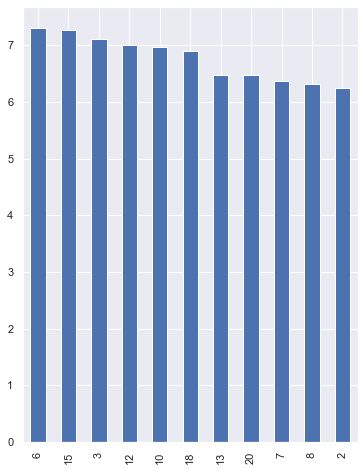

In [121]:
average_rating_mean['averagerating'].sort_values(ascending = False).head(11).plot(kind = 'bar')
plt.show()

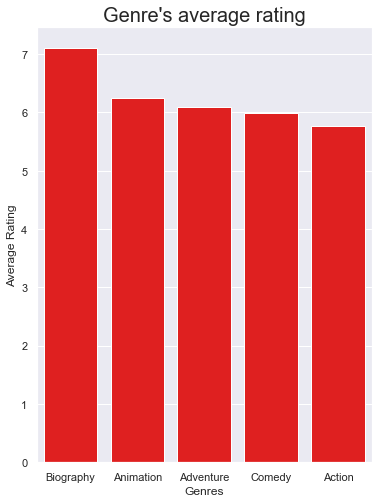

In [183]:
fig, ax = plt.subplots()
sns.set(rc = {'figure.figsize':(6,8)})
sns.barplot(x = 'genres', y = 'averagerating', data = average_rating_mean.head(5), color = 'red',
                           order = average_rating_mean.head(5).sort_values('averagerating',ascending = False).genres)
plt.xlabel('Genres')
plt.ylabel('Average Rating', rotation = 90)
plt.title("Genre's average rating", fontsize = 20)
plt.show()

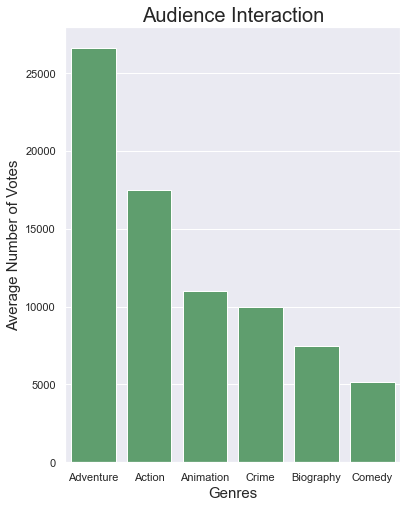

In [212]:
fig, ax = plt.subplots()
sns.set(rc = {'figure.figsize':(6,8)})
sns.barplot(x = 'genres', y = 'numvotes', data = average_rating_mean.head(6), color = 'g',
                           order = average_rating_mean.head(6).sort_values('numvotes',ascending = False).genres)
plt.xlabel('Genres', fontsize = 15)
plt.ylabel('Average Number of Votes', fontsize = 15)
plt.title('Audience Interaction', fontsize = 20)
plt.show()

In [128]:
average_budget_df = imdb_budget_df.groupby('genres', as_index = False).mean()
average_budget_df.sort_values(by = 'profit_margin', ascending = False)

,genres,start_year,runtime_minutes,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,revenue,profit_margin
2,Animation,2014.143084,93.306041,6.493482,103205.967409,46.825119,8.692082e+07,1.175884e+08,3.225839e+08,4.095047e+08,0.659178
1,Adventure,2014.244505,109.350504,6.388004,172363.627518,48.918040,9.267462e+07,1.073974e+08,3.011226e+08,3.937973e+08,0.626322
9,Fantasy,2013.788690,108.805357,6.019107,121828.050595,50.448810,7.103324e+07,7.943705e+07,2.200906e+08,2.911239e+08,0.599425
8,Family,2013.538348,103.435103,6.207006,62351.460914,53.851770,5.469347e+07,7.206057e+07,1.700172e+08,2.247107e+08,0.580204
14,Mystery,2013.937908,102.634454,6.032680,85745.464986,54.106909,2.134720e+07,3.177445e+07,7.090425e+07,9.225144e+07,0.564652
0,Action,2014.045992,110.764039,6.124363,142163.897350,50.135477,6.691027e+07,7.313149e+07,1.969462e+08,2.638564e+08,0.562108
12,Music,2013.714083,105.517781,6.472546,50956.886202,58.652916,1.514410e+07,2.969315e+07,6.282952e+07,7.797362e+07,0.561593
17,Sci-Fi,2014.313906,109.429959,6.178834,206173.396728,51.843558,7.191794e+07,9.364577e+07,2.532340e+08,3.251520e+08,0.556912
4,Comedy,2013.660592,101.715264,6.179090,69352.203343,50.835434,3.393664e+07,4.848426e+07,1.087715e+08,1.427081e+08,0.553408
16,Romance,2013.265234,105.711995,6.283547,53776.295702,52.747595,2.064924e+07,2.993205e+07,6.421039e+07,8.485963e+07,0.545122


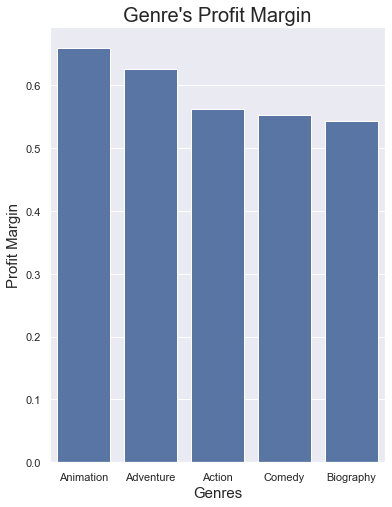

In [210]:
fig, ax = plt.subplots()
sns.set(rc = {'figure.figsize':(6,8)})
sns.barplot(x = 'genres', y = 'profit_margin', data = average_budget_df.head(), color = 'b',
                           order = average_budget_df.head().sort_values('profit_margin',ascending = False).genres)
plt.xlabel('Genres', fontsize = 15)
plt.ylabel('Profit Margin', fontsize = 15)
plt.title("Genre's Profit Margin", fontsize = 20)
plt.show()

In [143]:
imdb_budget_df["day"] = imdb_budget_df['release_date'].map(lambda x: x.day)
imdb_budget_df["month"] = imdb_budget_df['release_date'].map(lambda x: x.month)
imdb_budget_df["year"] = imdb_budget_df['release_date'].map(lambda x: x.year)
imdb_budget_df

,movie_id,primary_title,original_title,genres,start_year,runtime_minutes,averagerating,numvotes,primary_name,category,id,release_date,production_budget,domestic_gross,worldwide_gross,revenue,profit_margin,day,month,year
40,tt0475290,"Hail, Caesar!","Hail, Caesar!",Comedy,2016.0,106.0,6.3,111422.0,Roger Deakins,cinematographer,22.0,2016-02-05,22000000.0,30080225.0,64160680.0,86160680.0,0.744663,5,2,2016
41,tt0475290,"Hail, Caesar!","Hail, Caesar!",Drama,2016.0,106.0,6.3,111422.0,Roger Deakins,cinematographer,22.0,2016-02-05,22000000.0,30080225.0,64160680.0,86160680.0,0.744663,5,2,2016
42,tt0475290,"Hail, Caesar!","Hail, Caesar!",Music,2016.0,106.0,6.3,111422.0,Roger Deakins,cinematographer,22.0,2016-02-05,22000000.0,30080225.0,64160680.0,86160680.0,0.744663,5,2,2016
43,tt0475290,"Hail, Caesar!","Hail, Caesar!",Comedy,2016.0,106.0,6.3,111422.0,Josh Brolin,actor,22.0,2016-02-05,22000000.0,30080225.0,64160680.0,86160680.0,0.744663,5,2,2016
44,tt0475290,"Hail, Caesar!","Hail, Caesar!",Drama,2016.0,106.0,6.3,111422.0,Josh Brolin,actor,22.0,2016-02-05,22000000.0,30080225.0,64160680.0,86160680.0,0.744663,5,2,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026474,tt8662424,Never Again,Never Again,Drama,2017.0,106.0,5.7,67.0,Kristen Carletta,actress,47.0,2002-07-12,500000.0,307631.0,308793.0,808793.0,0.381795,12,7,2002
1026475,tt8662424,Never Again,Never Again,Drama,2017.0,106.0,5.7,67.0,Jay Coster,director,47.0,2002-07-12,500000.0,307631.0,308793.0,808793.0,0.381795,12,7,2002
1026476,tt8662424,Never Again,Never Again,Drama,2017.0,106.0,5.7,67.0,Katie Watling,producer,47.0,2002-07-12,500000.0,307631.0,308793.0,808793.0,0.381795,12,7,2002
1026477,tt8662424,Never Again,Never Again,Drama,2017.0,106.0,5.7,67.0,Ben Gordelia,composer,47.0,2002-07-12,500000.0,307631.0,308793.0,808793.0,0.381795,12,7,2002


In [147]:
imdb_budget_df['months'] = imdb_budget_df['release_date'].dt.month_name().str[:]
imdb_budget_df

,movie_id,primary_title,original_title,genres,start_year,runtime_minutes,averagerating,numvotes,primary_name,category,...,release_date,production_budget,domestic_gross,worldwide_gross,revenue,profit_margin,day,month,year,months
40,tt0475290,"Hail, Caesar!","Hail, Caesar!",Comedy,2016.0,106.0,6.3,111422.0,Roger Deakins,cinematographer,...,2016-02-05,22000000.0,30080225.0,64160680.0,86160680.0,0.744663,5,2,2016,February
41,tt0475290,"Hail, Caesar!","Hail, Caesar!",Drama,2016.0,106.0,6.3,111422.0,Roger Deakins,cinematographer,...,2016-02-05,22000000.0,30080225.0,64160680.0,86160680.0,0.744663,5,2,2016,February
42,tt0475290,"Hail, Caesar!","Hail, Caesar!",Music,2016.0,106.0,6.3,111422.0,Roger Deakins,cinematographer,...,2016-02-05,22000000.0,30080225.0,64160680.0,86160680.0,0.744663,5,2,2016,February
43,tt0475290,"Hail, Caesar!","Hail, Caesar!",Comedy,2016.0,106.0,6.3,111422.0,Josh Brolin,actor,...,2016-02-05,22000000.0,30080225.0,64160680.0,86160680.0,0.744663,5,2,2016,February
44,tt0475290,"Hail, Caesar!","Hail, Caesar!",Drama,2016.0,106.0,6.3,111422.0,Josh Brolin,actor,...,2016-02-05,22000000.0,30080225.0,64160680.0,86160680.0,0.744663,5,2,2016,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026474,tt8662424,Never Again,Never Again,Drama,2017.0,106.0,5.7,67.0,Kristen Carletta,actress,...,2002-07-12,500000.0,307631.0,308793.0,808793.0,0.381795,12,7,2002,July
1026475,tt8662424,Never Again,Never Again,Drama,2017.0,106.0,5.7,67.0,Jay Coster,director,...,2002-07-12,500000.0,307631.0,308793.0,808793.0,0.381795,12,7,2002,July
1026476,tt8662424,Never Again,Never Again,Drama,2017.0,106.0,5.7,67.0,Katie Watling,producer,...,2002-07-12,500000.0,307631.0,308793.0,808793.0,0.381795,12,7,2002,July
1026477,tt8662424,Never Again,Never Again,Drama,2017.0,106.0,5.7,67.0,Ben Gordelia,composer,...,2002-07-12,500000.0,307631.0,308793.0,808793.0,0.381795,12,7,2002,July


In [196]:
best_month_df = imdb_budget_df.groupby('months', as_index = False).mean()
best_month_df

,months,start_year,runtime_minutes,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,revenue,profit_margin,day,month,year
0,April,2013.839670,103.916091,6.227093,62573.368856,49.697581,3.007457e+07,3.720952e+07,9.713190e+07,1.272065e+08,0.538491,15.825077,4.0,2011.947773
1,August,2013.736312,101.658615,6.196860,73578.618760,55.121981,2.898987e+07,3.420123e+07,7.277918e+07,1.017691e+08,0.526730,15.639090,8.0,2010.387279
2,December,2013.881741,108.059476,6.256897,72798.294746,51.893248,3.379236e+07,4.266593e+07,1.037712e+08,1.375635e+08,0.470402,20.179260,12.0,2010.916955
3,February,2014.254245,103.327518,6.136032,75804.922540,53.899046,3.522255e+07,4.710719e+07,1.029463e+08,1.381688e+08,0.556900,13.002791,2.0,2009.644103
4,January,2014.087994,105.591072,6.046075,49129.148794,55.668548,2.680779e+07,3.260607e+07,7.161004e+07,9.841783e+07,0.546653,17.450231,1.0,2011.536429
5,July,2013.773104,105.099851,6.256830,108590.215424,50.659018,4.743107e+07,6.115149e+07,1.606204e+08,2.080514e+08,0.571765,16.229658,7.0,2010.197578
6,June,2013.874314,105.713036,6.304027,104119.164735,52.078300,5.741391e+07,8.053780e+07,1.992013e+08,2.566153e+08,0.570093,15.405939,6.0,2010.864958
7,March,2014.082630,104.097201,6.241814,89977.758436,51.377109,4.946586e+07,6.000928e+07,1.438677e+08,1.933335e+08,0.530293,16.228528,3.0,2013.133052
8,May,2013.814906,108.330948,6.267769,125336.762586,47.865745,6.485966e+07,7.335960e+07,1.952627e+08,2.601224e+08,0.549971,15.312932,5.0,2011.734452
9,November,2013.954924,109.017235,6.508409,119765.775189,46.823106,5.064414e+07,6.740193e+07,1.760020e+08,2.266461e+08,0.592526,14.536742,11.0,2011.003409


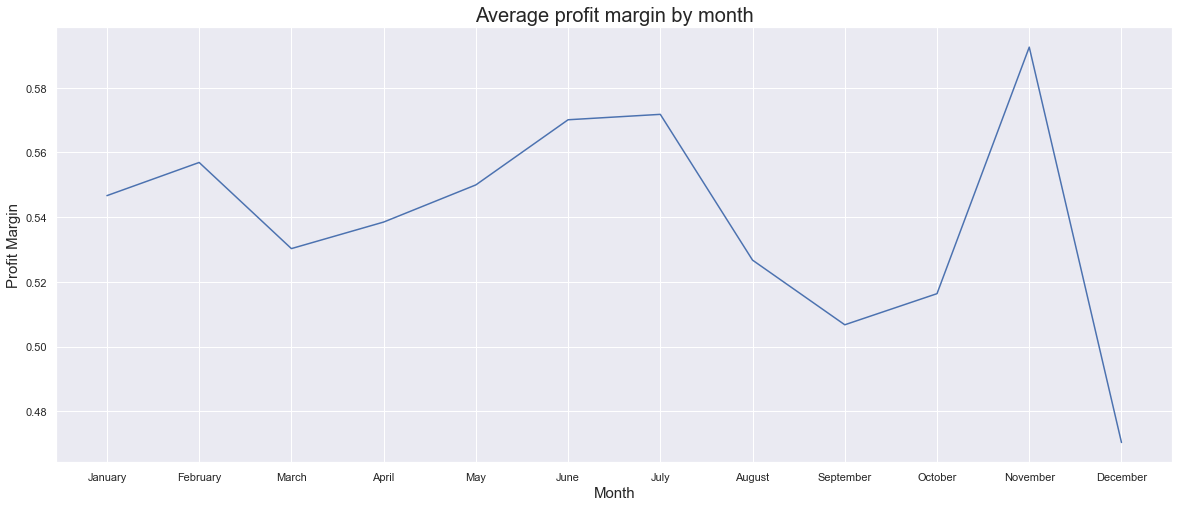

In [214]:
fig, ax = plt.subplots()
sns.set(rc = {'figure.figsize':(20,8)})
sns.lineplot(x = 'months', y = 'profit_margin', data = best_month_df.sort_values(by = 'month') , color = 'b')
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Profit Margin', fontsize = 15)
plt.title('Average profit margin by month', fontsize = 20)
plt.show()

In [221]:
sg_df = imdb_budget_df.loc[imdb_budget_df['genres'].isin(["Musical", "Family", "Animation", "Action", "Adventure", "Fantasy", "Scifi"])]

In [234]:
sg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14860 entries, 370 to 1020644
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_id           14860 non-null  object        
 1   primary_title      14860 non-null  object        
 2   original_title     14860 non-null  object        
 3   genres             14860 non-null  object        
 4   start_year         14860 non-null  float64       
 5   runtime_minutes    14860 non-null  float64       
 6   averagerating      14860 non-null  float64       
 7   numvotes           14860 non-null  float64       
 8   primary_name       14859 non-null  object        
 9   category           14860 non-null  object        
 10  id                 14860 non-null  float64       
 11  release_date       14860 non-null  datetime64[ns]
 12  production_budget  14860 non-null  float64       
 13  domestic_gross     14860 non-null  float64       
 14  wo

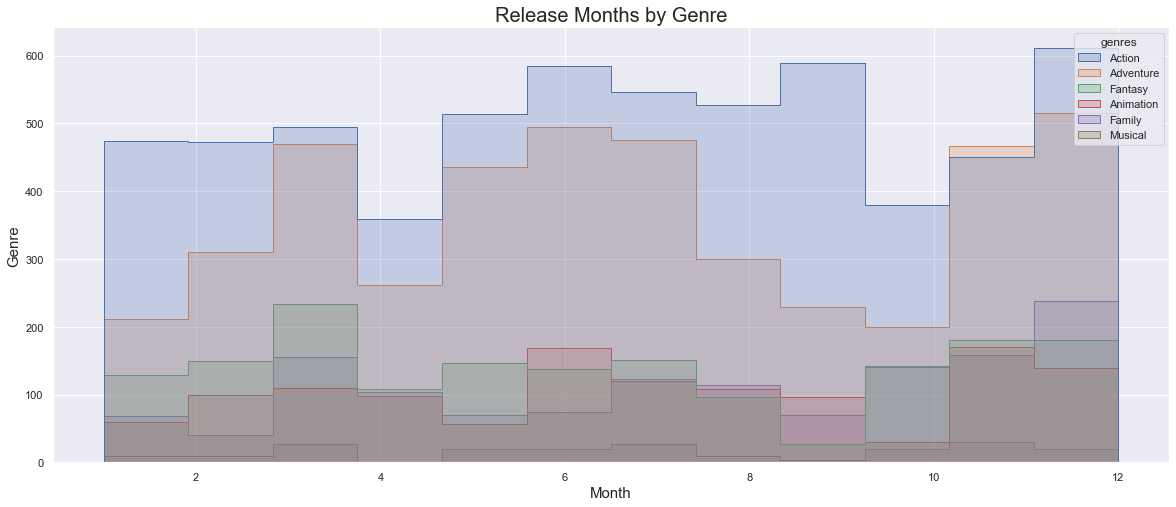

In [242]:
fig, ax = plt.subplots()
sns.set(rc = {'figure.figsize':(20,8)})
sns.histplot(x = 'month', hue = 'genres', element="step", data = sg_df, bins = 12)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Genre', fontsize = 15)
plt.title('Release Months by Genre', fontsize = 20)
plt.show()

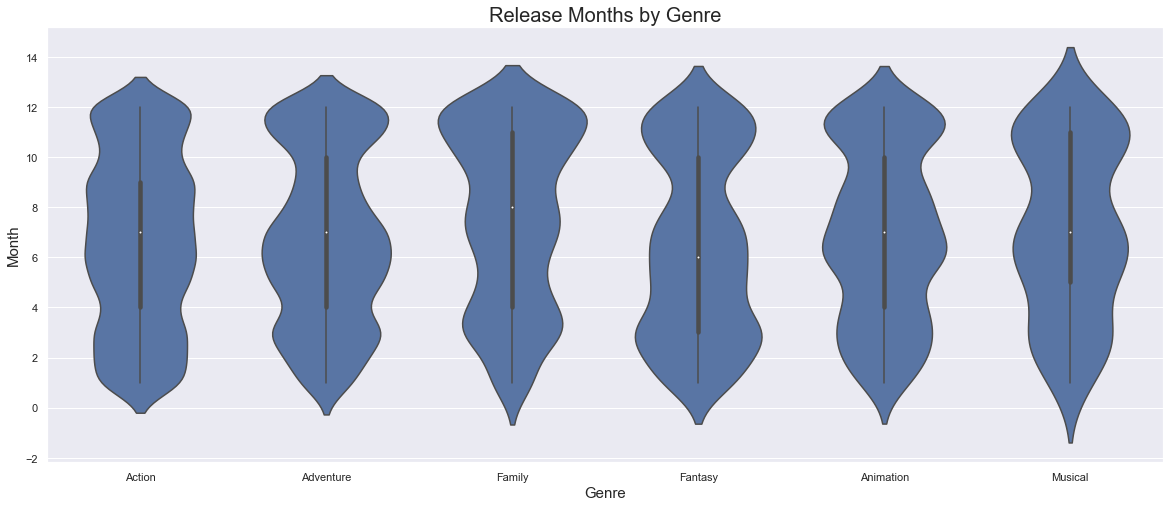

In [235]:
fig, ax = plt.subplots()
sns.set(rc = {'figure.figsize':(20,8)})
sns.violinplot(x = 'genres', y = 'month', data = sg_df.sort_values(by = 'months') , color = 'b')
plt.xlabel('Genre', fontsize = 15)
plt.ylabel('Month', fontsize = 15)
plt.title('Release Months by Genre', fontsize = 20)
plt.show()

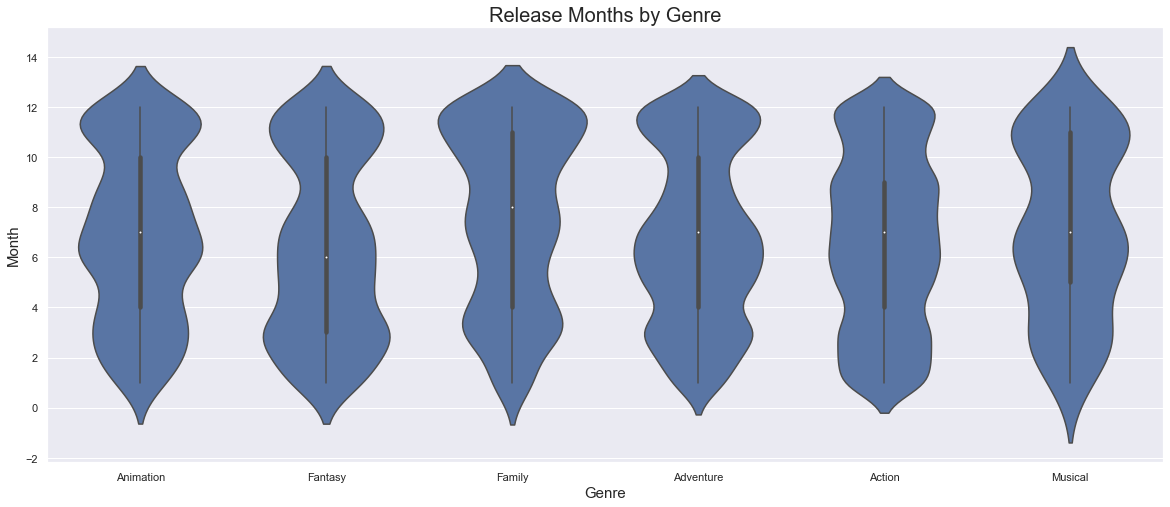

In [231]:
fig, ax = plt.subplots()
sns.set(rc = {'figure.figsize':(20,8)})
sns.violinplot(x = 'genres', y = 'month', data = sg_df.sort_values(by = 'month') , color = 'b')
plt.xlabel('Genre', fontsize = 15)
plt.ylabel('Month', fontsize = 15)
plt.title('Release Months by Genre', fontsize = 20)
plt.show()